# 1- Introdução

O objetivo do projeto é apresentar uma aplicação do método Box & Jenkins ou modelagem ARIMA na projeção de variáveis econômicas. Para auxiliar no melhor resultado, será utilizado o AutoARIMA da biblioteca pmdARIMA, incluindo na modelagem componentes AR, MA e de sazonalidade, num modelo SARIMAX. A variável utilizada na predição é: Consumo de energia industrial da região Sudeste (en_ind_se), que tem a unidade de medida: Gigawatt-hora (Gwh).  O período analisado é entre janeiro de 2004 e junho de 2021. Os dados utilizados estão publicamente disponíveis na série histórica da página da Empresa de Pesquisa Energética (EPE): https://www.epe.gov.br/pt/publicacoes-dados-abertos/publicacoes/consumo-de-energia-eletrica 

1- Introdução

2 - Importação de bibliotecas

3 - Importação de base de dados

4 - Análise exploratória

- 4.1 Análise gráfica
- 4.2 Teste Dickey-Fuller Aumentado(em nível)

5 - Análise de estacionariedade

- 4.1 Seleção de amostra a partir de 2010
- 4.2 Dessazonalização
- 4.3 Diferenciação
- 4.4 Teste Dickey-Fuller Aumentado (1ª diferença)

6 - Modelagem

7 - Treinamento Modelo

8 - Verificação de modelo

9 - Projeção

10 - Métricas de performance

11 - Conclusão

12 - Referências

# 2 - Importação de bibliotecas

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn import metrics as m
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pmdarima.arima import auto_arima

# 3 - Importação de base de dados

In [2]:
df = pd.read_excel('energia_ind_se.xlsx', index_col = 0, usecols = [0,1])

In [3]:
df.head()

,en_ind_se
data,
2004-01-01,6977.47082
2004-02-01,7084.62266
2004-03-01,7087.61326
2004-04-01,7384.53963
2004-05-01,7258.30672


# 4 - Análise exploratória

- 4.1 Análise gráfica 

<AxesSubplot:xlabel='data'>

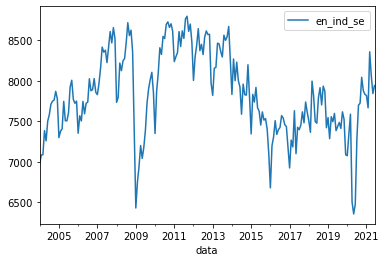

In [4]:
df.plot()

A partir do gráfico acima pode-se perceber dois conjuntos de outliers na série. O primeiro ocorre entre 2008 e 2009 devido à crise financeira do subprime que impacta na produção industrial brasileira e consequentemente no consumo de energia industrial. O segundo decorre dos impactos da pandemia do Covid-19 no país, ocorrendo uma redução no consumo entre abril de 2020 e julho de 2020.

A paritr do comportamento do gráfico e do conhecimento prévio sobre o comportamento do consumo de energia industrial, é possível verificar sazonalidade da série, que deve ser tratada a fim de não prejudicar a análise de estacionariedade.

Em relação a sua estacionariedade, ao se fazer uma análise do gráfico acima, pode-se constatar que a variável não apresenta uma média e nem variância constantes. Além disso, ela aparenta ter uma tendência estocástica. Dessa forma, na tentativa de obter uma série estacionária deve-se analisá-la em sua primeira diferença.

- 4.2 Teste Dickey-Fuller Aumentado (em nível)

In [5]:
adf_test = adfuller(df, regression='c')
adf_test1= adfuller(df, regression='ct')
adf_test2 = adfuller(df, regression='ctt')
adf_test3 = adfuller(df, regression='n')

In [6]:
print('Teste estatístico:', adf_test[0])
print('p-valor:', adf_test[1])
print('')
print('Teste estatístico:', adf_test1[0])
print('p-valor:', adf_test1[1])
print('')
print('Teste estatístico:', adf_test2[0])
print('p-valor:', adf_test2[1])
print('')
print('Teste estatístico:', adf_test3[0])
print('p-valor:', adf_test3[1])

Teste estatístico: -2.8203030891867384
p-valor: 0.05543163107090939

Teste estatístico: -2.948096319079903
p-valor: 0.14717482645580526

Teste estatístico: -2.6241597668299326
p-valor: 0.4978190492653489

Teste estatístico: 0.22454922295134144
p-valor: 0.7538410445383855


Em conformidade com a análise inicial, pode-se ver que a série é não estacionária em nível, uma vez que não se rejeita a hipótese nula de existência de raiz unitária para qualquer configuração da regressão.

# 4 - Análise de estacionariedade

 - 4.1 Seleção de amostra a partir de 2010 

Uma vez que de 2008 a 2009 há outliers devido a crise de 2008, utliza-se os dados à partir de janeiro de 2010

In [7]:
df1 = df[72:210]

- 4.2 Dessazonalização 

Utiliza-se o método de médias móveis com um período de três meses para fazer a dessazonalização

In [8]:
df2 = df1.rolling(window=3)
df2_mean = df2.mean()
df3 = df2_mean.dropna()

Comparando-se o gráfico original com o dessazonalizado tem-se:

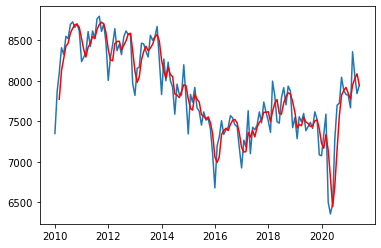

In [9]:
plt.plot(df1)
plt.plot(df3, color='red')

- 4.3 Diferenciação

Fazendo a primeira diferença da série, tem-se o seguinte gráfico: 

<AxesSubplot:xlabel='data'>

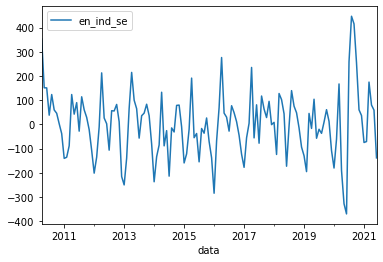

In [31]:
df4 = df3.diff().dropna()
df4.plot()

4.4 - Teste Dickey-Fuller Aumentado (1ª diferença)

In [12]:
adf_test4 = adfuller(df4, regression='c')
adf_test5 = adfuller(df4, regression='ct')
adf_test6 = adfuller(df4, regression='ctt')
adf_test7 = adfuller(df4, regression='n')

In [13]:
print('Teste estatístico:', adf_test4[0])
print('p-valor:', adf_test4[1])
print('')
print('Teste estatístico:', adf_test5[0])
print('p-valor:', adf_test5[1])
print('')
print('Teste estatístico:', adf_test6[0])
print('p-valor:', adf_test6[1])
print('')
print('Teste estatístico:', adf_test7[0])
print('p-valor:', adf_test7[1])

Teste estatístico: -2.8528470704370283
p-valor: 0.051112430707234945

Teste estatístico: -3.1238299689169318
p-valor: 0.10067502137471507

Teste estatístico: -3.5319218495451636
p-valor: 0.10505570942878928

Teste estatístico: -2.863432278289878
p-valor: 0.004102520708116143


A partir do teste Dickey-Fuller Aumentado (ADF), pode-se constatar que a estacionariedade foi atingida na primeira diferença, numa equação de regressão sem tendência e nem intercepto, sendo, portanto, uma variável integrada de primeira ordem. Dessa forma, ela pode ser modelada pelo método ARIMA

# 5 - Análise de correlograma 

C:\Users\Ricardo\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


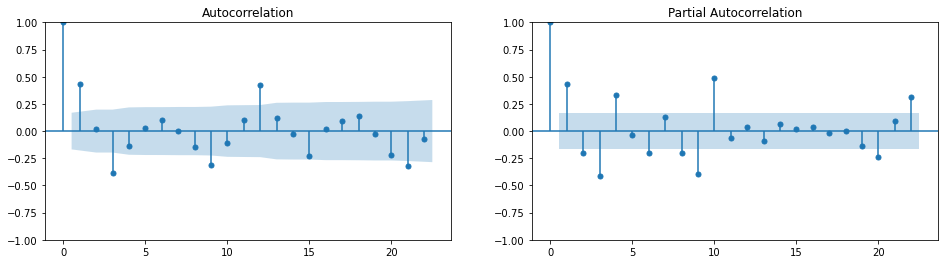

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

plot_acf(df4, ax=ax1)
plot_pacf(df4, ax=ax2);

Ao se analisar o correlograma de autocorrelação pode-se verificar que há uma alta correlação da variável com sua 1ª, 3ª e 12ª defasagem, o que pode indicar períodos relevantes para se configurar o componente MA do modelo ARIMA. Da mesma forma a 1ª, 3ª, 4ª, 9ª e 10ª defasagens no correlograma parcial podem ser relevantes para se configurar o componente AR.

# 6 - Modelagem 

Por ser mais prático, opta-se por utilizar o AutoArima da biblioteca pmdarima, uma vez que ele simula todos os componentes de defasagens tanto do ARIMA quanto da sazonalidade, em busca do melhor modelo SARIMAX, seguindo o critério definido.


Sobre os parâmetros:

- Como o SARIMAX modela também a sazonalidade, será utilizado o data frame sem o tratamento de sazonalidade:'df1'
- Será testado o componente AR de 0 a 12, portanto 'start_p = 0' e 'max_p = 12'
- Será testado o componente MA de 0 a 12, portanto 'start_q = 0' e 'max_q = 12'
- Como a sazonalidade é mensal, 'm = 12'
- Será modelado a sazonalidade, portanto 'seasonal=True'
- Para o teste dos componentes da sazonalidade são escolhidos as configurações padrões: 'start_P=0', 'max_P=2', 'start_Q=0', 'max_Q=2', 
- O critério escolhido é o índice Akaike, que diz respeito a confiabilidade do modelo, portanto "information_criterion='aic'"
- Como verificado nas seções anterior, o parâmetro d e D são configurados para a primeira diferença 'd=1' e 'D=1'
- Parâmetro 'trace=True' para mostrar a informação de todos os modelos simulados.
- Caso ocorra algum erro durante a simulação será explicitado: 'error_action='warn' e suppress_warnings=True'

In [27]:
model=auto_arima(df1, 
                 start_p=0, 
                 start_q=0, 
                 max_p=12, 
                 max_q=12, 
                 m=12, 
                 seasonal=True,
                 information_criterion='aic', 
                 trace=True, 
                 d=1, 
                 D=1, 
                 error_action='warn', 
                 suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1721.578, Time=0.82 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1741.759, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1721.783, Time=0.35 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1716.702, Time=0.67 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1741.895, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1718.512, Time=0.84 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1718.496, Time=1.87 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1721.337, Time=0.38 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=5.63 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1719.639, Time=0.55 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1718.573, Time=1.27 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1718.614, Time=1.27 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1717.093, Time=0.70 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=2.31 sec
 ARIMA(0,1,1)(0,1,1)[12] inte

Após o a simulação dos modelos chega-se que o modelo de menor Akaike é o modelo SARIMA(0,1,1)X(0,1,1)[12]

# 7 - Treinamento modelo

O período escolhido para a base de treino do modelo é de janeiro de 2010 a março de 2020, um mês antes do impacto da Covid-19 no Brasil 

In [16]:
train=df.loc['2010-01-01':'2020-03-01']
test=df.loc['2020-04-01':]

In [17]:
model_fit = model.fit(train)

# 8 - Análise do modelo 

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  123
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -728.027
Date:                            Thu, 18 Nov 2021   AIC                           1462.054
Time:                                    15:45:06   BIC                           1470.155
Sample:                                         0   HQIC                          1465.340
                                            - 123                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3840      0.074     -5.222      0.000      -0.528      -0.240
ma.S.L12      -0.6581      0.090     -7.352      0.000      -0.834      -0.483
sigma2      2.989e+04   4217.240      7.088      0.000    2.16e+04    3.82e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):                 0.89
Prob(Q):                              0.37   Prob(JB):                         0.64
Heteroskedasticity (H):               2.30   Skew:                             0.19
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

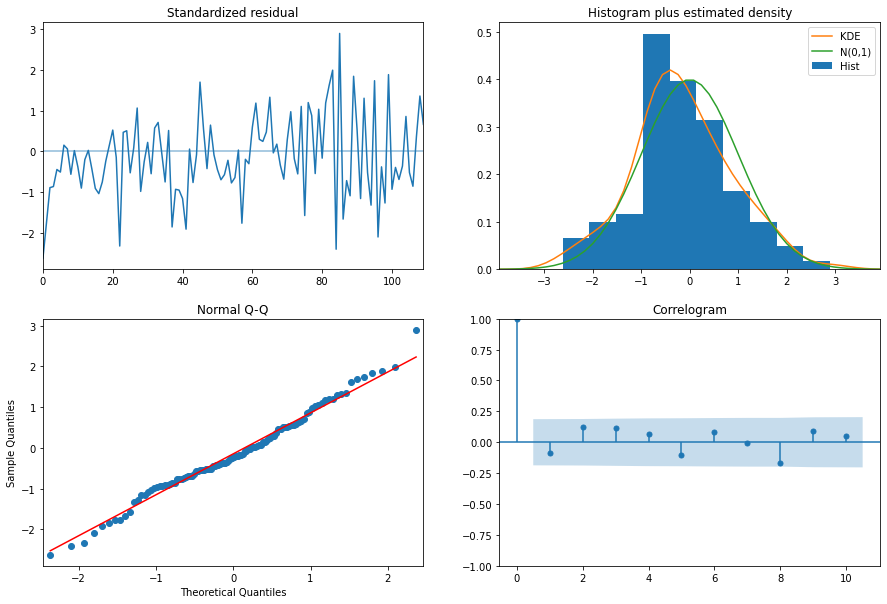

In [19]:
model.plot_diagnostics(figsize=(15, 10));

A partir da análise do teste Jarque-Bera, conclui-se que o modelo segue uma distribuição normal ao não rejeitar a hipótese nula de normalidade. A partir do teste L-Jung Box, que rejeita a hipótese nula de autocorrelação, e da análise do correlograma, pode-se constatar que a série não apresenta autocorrelção serial nos resíduos. No entanto, ainda apresenta heterocedasticidade, ao se rejeitar a hipótese nula de homocedasticidade.

# 9 - Projeção 

A projeção é realizada para o período a partir de abril de 2020 

In [20]:
forecast = model.predict(n_periods=15)

In [21]:
forecast1 = pd.DataFrame(forecast,index=test.index, columns=['Projeção do modelo'])

<Figure size 1296x360 with 0 Axes>

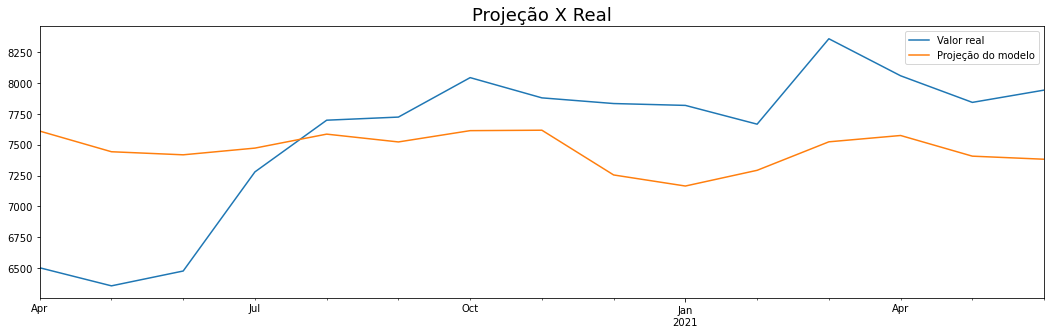

In [22]:
plt.figure(figsize=(18,5))
pd.concat([test,forecast1],axis=1).plot(figsize=(18,5))
plt.title('Projeção X Real',size=18)
plt.xlabel('')
plt.legend(['Valor real','Projeção do modelo'])
plt.show();

Comparação da curva projetada e dos valores reais do período entre abril de 2020 e junho de 2021 

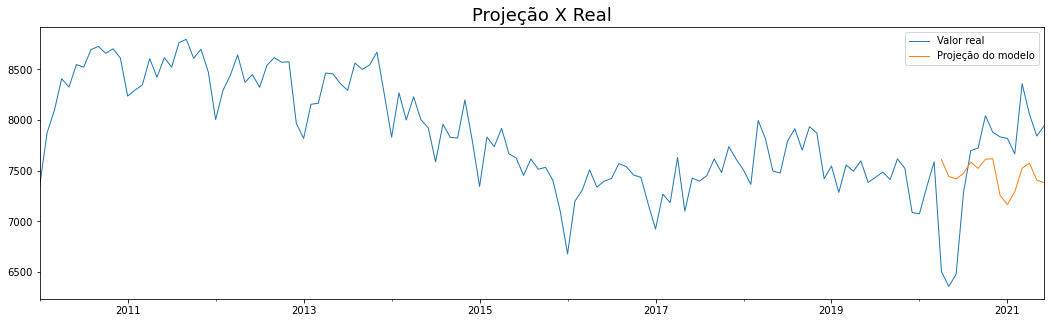

In [23]:
pd.concat([df1,forecast1],axis=1).plot(linewidth=1,figsize=(18,5))
plt.legend(['Valor real','Projeção do modelo'])
plt.title('Projeção X Real',size=18)
plt.xlabel('')
plt.show();

# 10 - Métricas de Performance

Como entre os meses de abril de 2020 e julho de 2020 os valores apresentam outliers devido ao impacto da pandemia nos valores de consumo de energia, as métricas de performances são analisadas à partir do mês de agosto de 2020 

In [24]:
forecast2 = forecast1[3:]
test1 = test[3:]

In [29]:
mae = m.mean_absolute_error(test1, forecast2)
mape = np.mean(np.abs((np.array(test1) - np.array(forecast2))/ np.array(test1)))
rmse = np.sqrt(mean_squared_error(test1, forecast2))
akaike = model.aic()

In [30]:
data = {
    'Métrica': ['MAE', 'MAPE', 'RMSE', 'Akaike'],
    'Valor': [mae, mape, rmse, akaike]
}

pd.DataFrame(data)

,Métrica,Valor
0,MAE,426.085612
1,MAPE,0.053783
2,RMSE,472.017526
3,Akaike,1716.702111


# 11 - Conclusão

A partir da análise do modelo, conclui-se que o modelo apresenta uma distribuição normal e não apresenta autocorrelação dos resíduos, ou seja, não há passados relevantes para serem adicionados ao modelo. No entanto, ainda apresenta heterocedasticidade e, portanto, ainda não pode ser classificado como modelo BLUE (best linear unbiased estimator).

Em relação às métricas de performance, o modelo apresentou relativamente baixos valores de erro médio (MAE) e erro quadrático médio(RMSE), o que pode ser ilustrado pela métrica de erro percentual médio(MAPE), que foi de aproximadamente 5,4%. Já o Akaike, é o menor possível dentre todos os modelos testados pelo AutoARIMA, sendo de 1716.70, sendo o modelo que menor apresenta risco.

Como próximos passos, será analisada a possibilidade de adicionar termos ARCH/GARCH, buscando um modelo homocedástico e o tratamento do outlier causado pela Covid-19 para se melhorar a performance do modelo SARIMAX

Por fim, será modelado uma equação multivariável considerando variáveis como a produção industrial do estado de São Paulo a fim de verificar se ele gera um modelo BLUE e com métricas de melhor performance.


# 12 - Referências

https://towardsdatascience.com/arima-vs-lstm-forecasting-electricity-consumption-3215b086da77

https://stackoverflow.com/questions/2067095/seasonal-adjustment-in-python-and-scipy

https://towardsdatascience.com/time-series-in-python-part-2-dealing-with-seasonal-data-397a65b74051

https://github.com/IvanildoBatista/Series-Temporais/tree/master/AutoARIMA

https://matheusduzzi.medium.com/s%C3%A9ries-temporais-no-r-e-python-774070577d5b